In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [4]:
train.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [5]:
train.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
train['Attrition'].value_counts()

0    879
1    179
Name: Attrition, dtype: int64

In [7]:
round(train['Attrition'].value_counts(normalize=True)*100,2)

0    83.08
1    16.92
Name: Attrition, dtype: float64

In [8]:
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## BASIC PRE-PROCESSING

### CHECKING FOR CONSTANT & QUASI CONSTANT FEATURES & DROPPING THEM


In [9]:
train.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    731
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1058
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                991
MonthlyRate                 1038
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
train.drop(columns=['EmployeeCount','Over18','StandardHours'], axis=1, inplace=True)
train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1483,2,...,4,1,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1484,3,...,3,2,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1485,2,...,3,4,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1486,1,...,3,4,1,5,3,4,3,2,1,2


#### The following columns were dropped:
- EmployeeCount
- Over18
- StandardHours

In [11]:
train.shape

(1058, 32)

In [12]:
train.drop(labels=list(filter(lambda keys: train[keys].value_counts().max()> 0.99*train.shape[0],train.keys())),axis=1,inplace=True)
train.shape

(1058, 32)

While deleting Quasi-constant columns, there was no evident change noticed.

### FINDING AND REMOVING DUPLICATES

In [13]:
temp=train

In [14]:
temp = temp.T
temp.duplicated().sum()
#No duplicate values present 

0

## ANALYZING TEST

In [15]:
test=pd.read_csv('test.csv')
test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,3,80,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,1,80,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,3,80,0,4,2,2,0,0,0,0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,3,80,1,1,2,3,1,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,2,80,0,16,2,2,2,2,2,2


In [16]:
test.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,412.000000,412.000000,412.000000,412.000000,412.0,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.0,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,36.584951,784.364078,9.742718,3.000000,1.0,1777.565534,2.745146,66.526699,2.711165,1.995146,...,2.674757,80.0,0.873786,10.878641,2.876214,2.754854,6.861650,4.148058,2.148058,4.072816
std,8.389257,390.361319,8.258996,1.001216,0.0,166.285256,1.094379,20.352054,0.729344,1.025218,...,1.056111,0.0,0.884356,7.133747,1.252430,0.704936,5.759814,3.640796,3.108723,3.491322
min,18.000000,104.000000,1.000000,1.000000,1.0,1489.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,464.750000,2.000000,2.000000,1.0,1637.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.500000,740.500000,8.000000,3.000000,1.0,1769.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,1147.750000,15.000000,4.000000,1.0,1929.500000,4.000000,85.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1495.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,36.000000,17.000000,14.000000,17.000000


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       412 non-null    int64 
 1   BusinessTravel            412 non-null    object
 2   DailyRate                 412 non-null    int64 
 3   Department                412 non-null    object
 4   DistanceFromHome          412 non-null    int64 
 5   Education                 412 non-null    int64 
 6   EducationField            412 non-null    object
 7   EmployeeCount             412 non-null    int64 
 8   EmployeeNumber            412 non-null    int64 
 9   EnvironmentSatisfaction   412 non-null    int64 
 10  Gender                    412 non-null    object
 11  HourlyRate                412 non-null    int64 
 12  JobInvolvement            412 non-null    int64 
 13  JobLevel                  412 non-null    int64 
 14  JobRole                   

In [18]:
test.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

There are no null values

### CHECKING FOR CONSTANT VALUES & DROPPING VALUES

In [19]:
test.nunique()

Age                          40
BusinessTravel                3
DailyRate                   354
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeNumber              412
EnvironmentSatisfaction       4
Gender                        2
HourlyRate                   71
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome               406
MonthlyRate                 410
NumCompaniesWorked           10
Over18                        1
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
RelationshipSatisfaction      4
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            36
TrainingTimesLastYear         7
WorkLifeBalance               4
YearsAtCompany               29
YearsInC

In [20]:
#Applying the same to Test
test.drop(columns=['EmployeeCount','Over18','StandardHours'], axis=1, inplace=True)
test.shape

(412, 31)

In [21]:
test.drop(labels=list(filter(lambda keys: test[keys].value_counts().max()> 0.99*test.shape[0],test.keys())),axis=1,inplace=True)
test.shape

(412, 31)

### FINDING AND REMOVING DUPLICATES

In [22]:
test1 = test.T
test1.duplicated().sum()
#No duplicate values present 

0

While deleting Quasi-constant columns, there was no evident change noticed.

# Exploratory Data Analysis

In [23]:
sns.set_style('whitegrid')

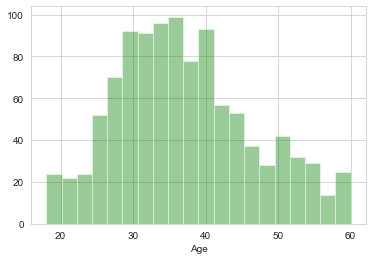

In [24]:
# sns.set_theme()
sns.distplot(train['Age'],kde=False,bins=20,color='green')

Distribution of Age is from about 18 to 60, with people being from ages of minimum 18 to maximum 60

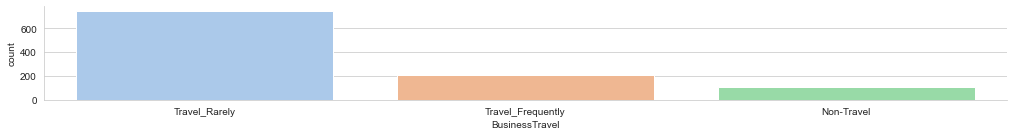

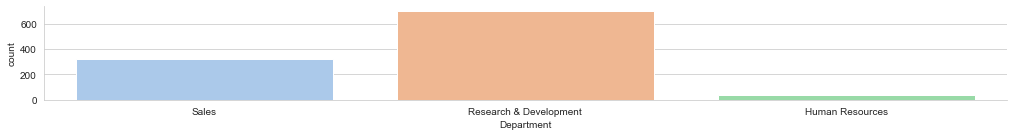

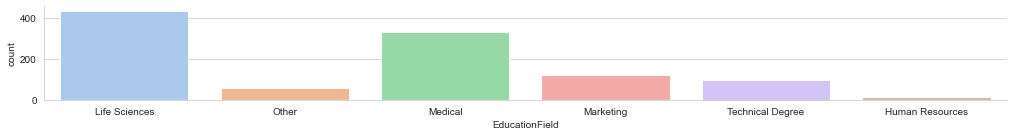

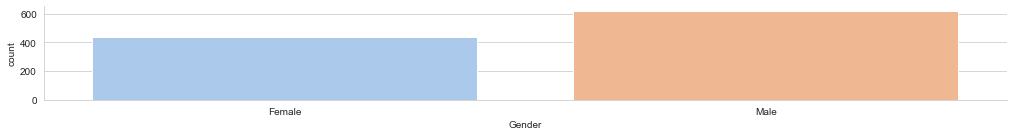

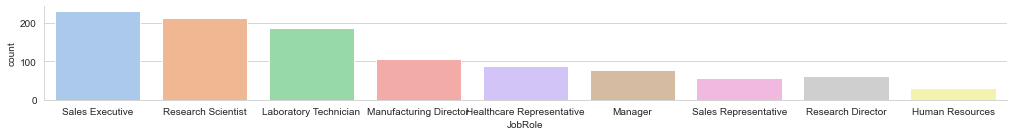

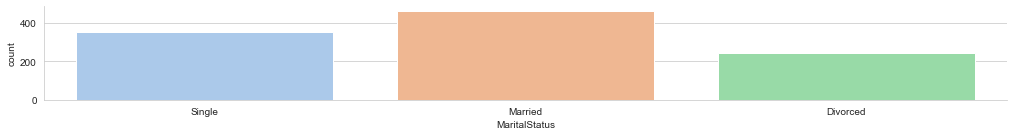

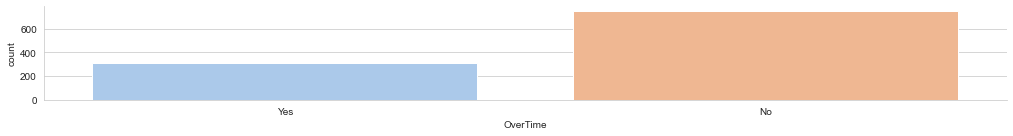

In [25]:
cat=train.select_dtypes(include=["object"])
for feat in cat.columns:
    sns.catplot(data = train, kind = 'count', aspect = 7, height = 2, x = feat,palette='pastel')

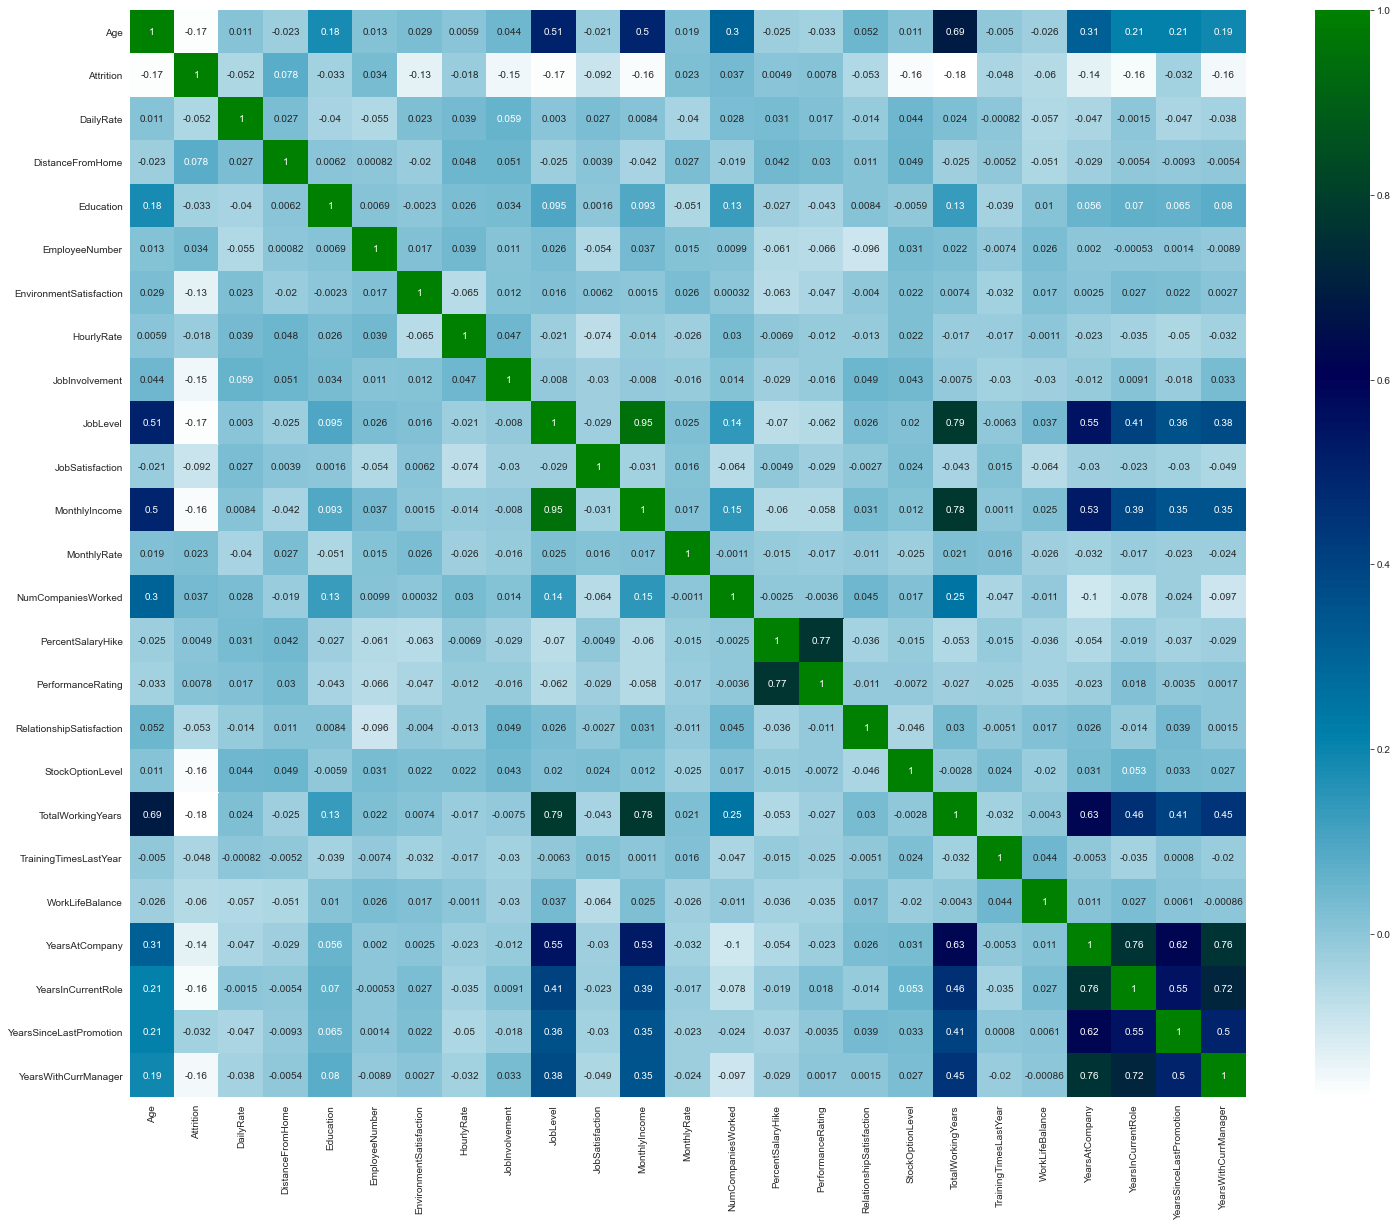

In [26]:
corr=train.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True,cmap="ocean_r")

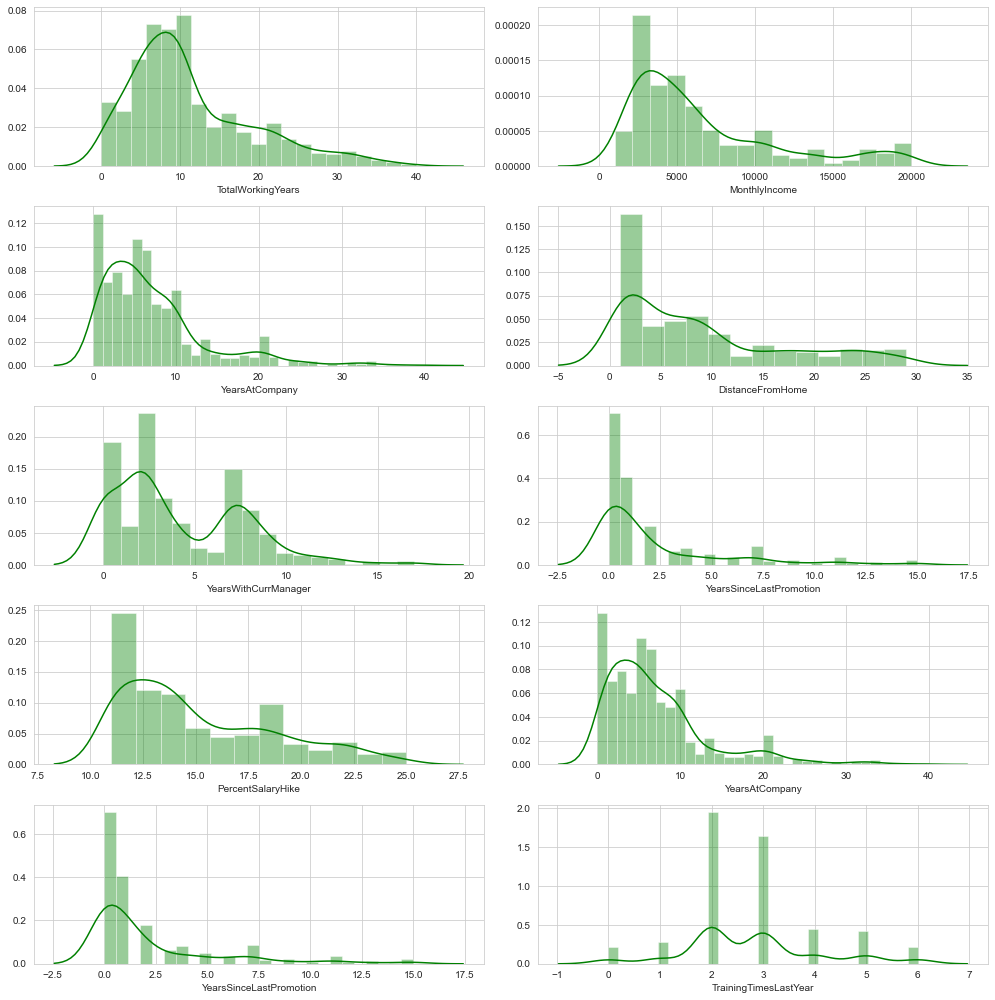

In [27]:
fig, ax = plt.subplots(5,2, figsize=(14,14))
sns.distplot(train['TotalWorkingYears'], ax = ax[0,0],color='green')
sns.distplot(train['MonthlyIncome'], ax = ax[0,1],color='green')
sns.distplot(train['YearsAtCompany'], ax = ax[1,0],color='green')
sns.distplot(train['DistanceFromHome'], ax = ax[1,1],color='green')
sns.distplot(train['YearsWithCurrManager'], ax = ax[2,0],color='green')
sns.distplot(train['YearsSinceLastPromotion'], ax = ax[2,1],color='green')
sns.distplot(train['PercentSalaryHike'], ax = ax[3,0],color='green')
sns.distplot(train['YearsAtCompany'], ax = ax[3,1],color='green')
sns.distplot(train['YearsSinceLastPromotion'], ax = ax[4,0],color='green')
sns.distplot(train['TrainingTimesLastYear'], ax = ax[4,1],color='green')
plt.tight_layout()
plt.show()

In [28]:
continous = ['Age',  'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany' ]

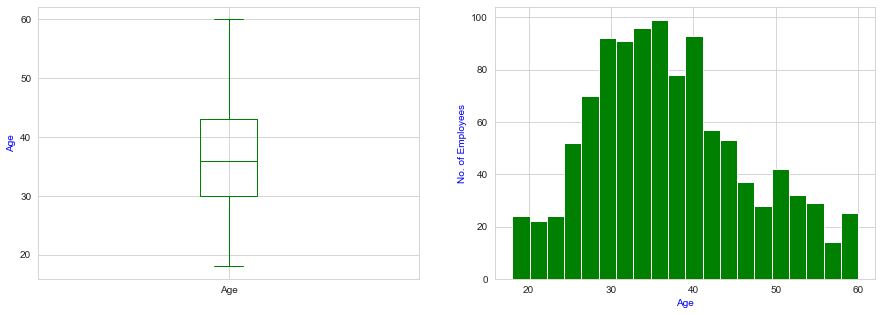

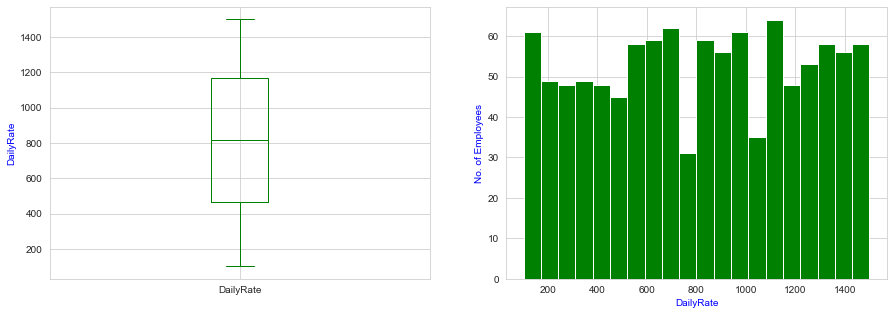

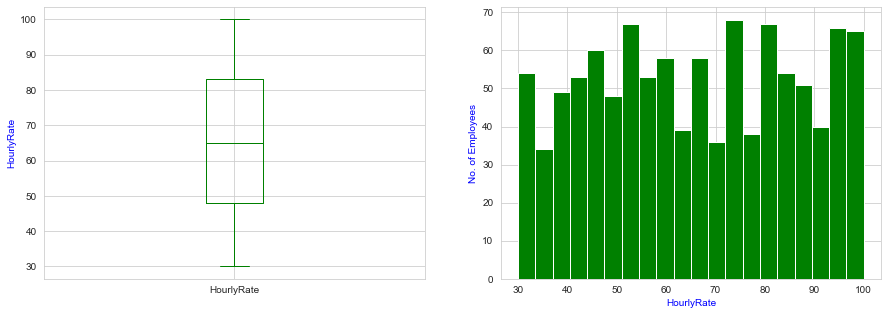

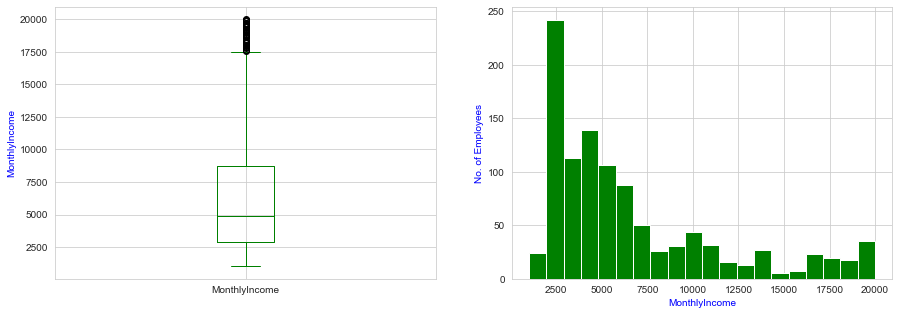

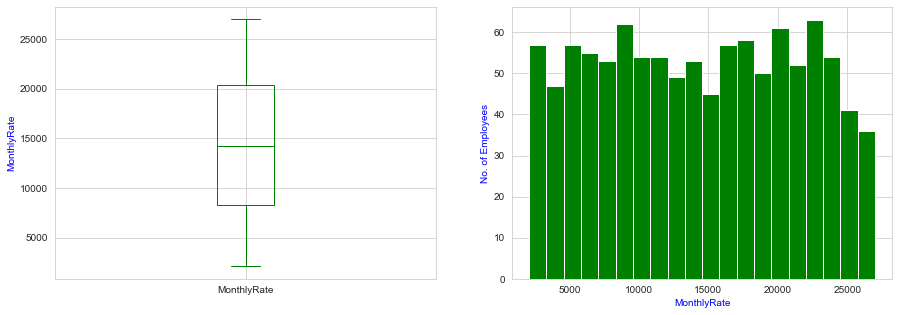

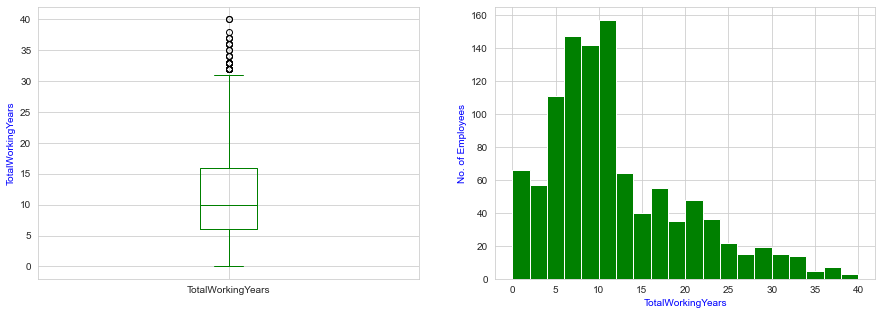

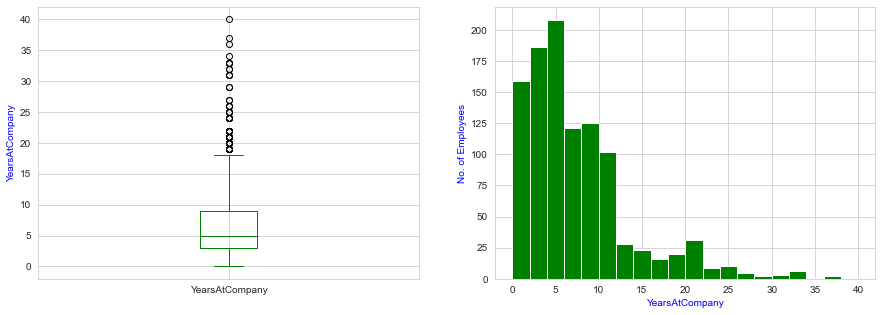

In [29]:
for var in continous:
    #boxplot
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    fig = train.boxplot(column = var,color='green')
    fig.set_ylabel(var,color='blue')
    
    #histogram
    plt.subplot(1,2,2)
    fig = train[var].hist(bins = 20,color='green')
    fig.set_ylabel('No. of Employees',color='blue')
    fig.set_xlabel(var,color='blue')
    
    plt.show()
    

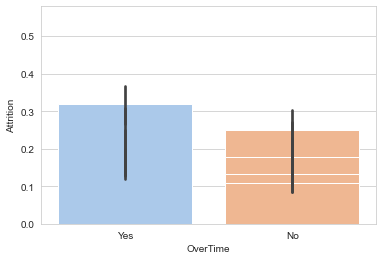

In [30]:
cat=train.select_dtypes(include=["object"])
for feat in cat.columns:
    sns.barplot(y='Attrition',x=feat,data = train,palette='pastel')

In [31]:
cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

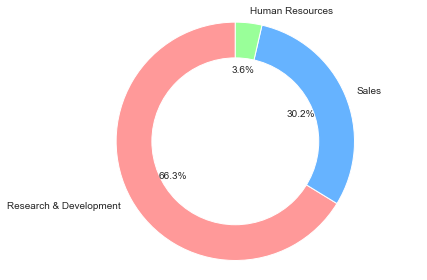

In [32]:

# Pie chart
labels = ['Research & Development','Sales','Human Resources']
# sizes = [15, 30, 45, 10]#colors
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(train['Department'].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

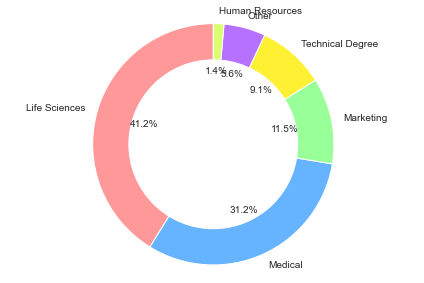

In [33]:
labels = ['Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources']
colors = ['#ff9999','#66b3ff','#99ff99','#fff033','#b671ff','#daff71']
 
fig1, ax1 = plt.subplots()
ax1.pie(train['EducationField'].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

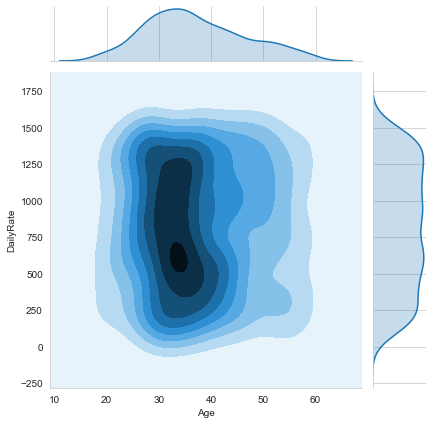

In [34]:
sns.jointplot(x='Age',y='DailyRate',data=train,kind='kde')

## FEATURE ENGINEERING

In [35]:
num=train.select_dtypes(exclude=["object"])
num.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [36]:
categorical_cols = {'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus', 'OverTime'}
for col in categorical_cols:
    target_mapper = train.groupby(col)['Attrition'].mean().to_dict()
    train[col] =  train[col].map(target_mapper)
    test[col] =  test[col].map(target_mapper)

In [37]:
train.drop('EmployeeNumber',inplace=True,axis=1)

In [38]:
test.drop('EmployeeNumber',inplace=True,axis=1)

In [39]:
x=[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
    'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in x:
    train[col] = scaler.fit_transform(train[col])
    test[col]= scaler.transform(test[col])
train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1,0.156836,0.715820,0.206897,0.000000,0.25,0.160550,0.333333,0.162100,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0,0.248780,0.126700,0.152639,0.250000,0.00,0.160550,0.666667,0.174194,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,1,0.156836,0.909807,0.152639,0.035714,0.25,0.169492,1.000000,0.174194,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0,0.248780,0.923407,0.152639,0.071429,0.75,0.160550,1.000000,0.162100,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,0,0.156836,0.350036,0.152639,0.035714,0.00,0.139394,0.000000,0.174194,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.928571,0,0.156836,0.216893,0.152639,0.000000,0.25,0.160550,0.333333,0.174194,...,1.0,0.000000,0.333333,0.325,0.333333,0.333333,0.300,0.500000,0.133333,0.470588
1054,0.738095,0,0.156836,0.993558,0.152639,0.214286,0.75,0.160550,0.666667,0.174194,...,0.0,0.333333,0.666667,0.725,0.500000,0.666667,0.200,0.388889,0.000000,0.411765
1055,0.380952,0,0.248780,0.520401,0.152639,0.500000,0.50,0.139394,0.333333,0.174194,...,0.0,1.000000,0.666667,0.400,0.500000,0.333333,0.350,0.444444,0.400000,0.529412
1056,0.238095,1,0.248780,0.997853,0.206897,0.000000,0.50,0.260417,0.000000,0.174194,...,0.0,1.000000,0.333333,0.125,0.500000,1.000000,0.075,0.111111,0.066667,0.117647


### FEATURE SELECTION 

In [40]:
#Using Filter Methods
corrr = train.corr()

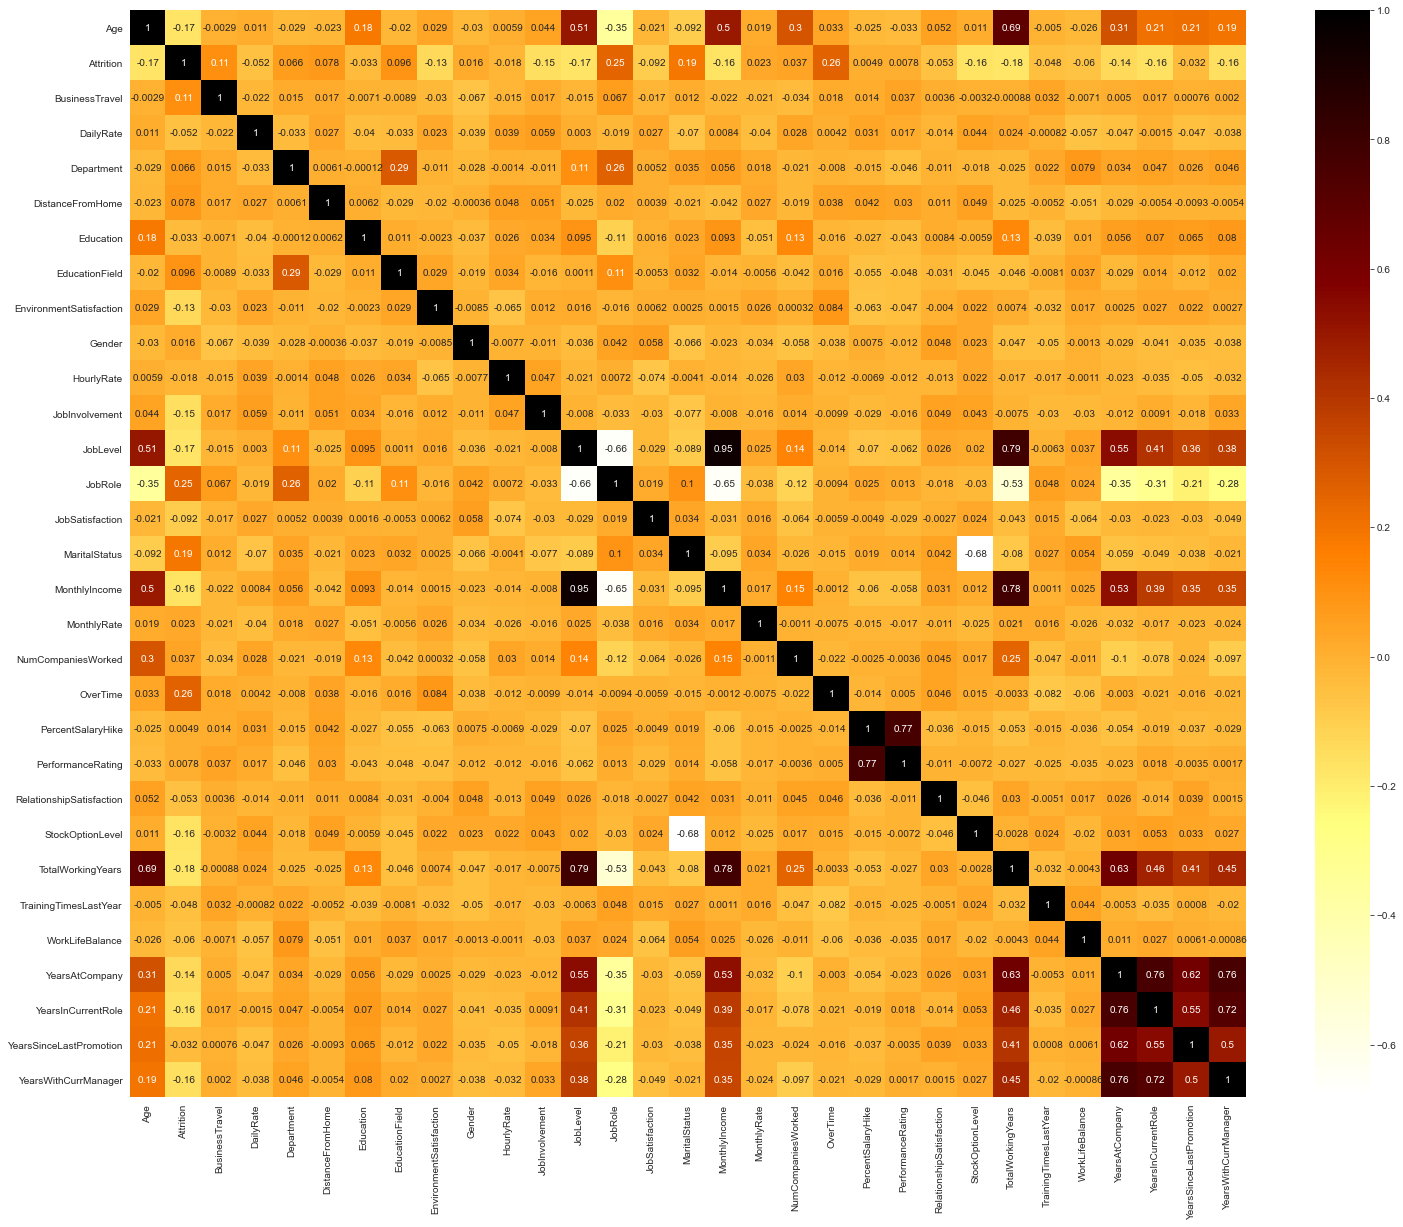

In [41]:
plt.figure(figsize=(25,20))
sns.heatmap(corrr,annot=True,cmap='afmhot_r')

In [42]:
def handling_correlation(train,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = train.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [43]:
handling_correlation(train.copy(),threshold=0.85)

['MonthlyIncome']

In [44]:
train.drop(columns = ['MonthlyIncome'],axis=1,inplace=True)
test.drop(columns = ['MonthlyIncome'],axis=1,inplace=True)

We have to drop columns having threshold > 0.8 from Train & Test datasets

In [45]:
test.shape

(412, 29)

In [46]:
train.shape

(1058, 30)

### MODELING FOR TRAIN

In [47]:
#Splitting Data into Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns = ['Attrition'],axis=1), train.Attrition)

In [48]:
# Shape of the X_train and X_test
print(X_train.shape)
print(X_test.shape)

(793, 29)
(265, 29)


#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(X_train,y_train)
model_predictions = model.predict(X_test)
print("Accuracy: ", round(accuracy_score(y_test, model_predictions),2),"%")
print(classification_report(y_test, model_predictions))

Accuracy:  0.86 %
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       215
           1       0.93      0.28      0.43        50

    accuracy                           0.86       265
   macro avg       0.89      0.64      0.68       265
weighted avg       0.87      0.86      0.83       265



#### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model_predictions = model.predict(X_test)
print("Accuracy: ", round(accuracy_score(y_test, model_predictions),2),"%")
print(classification_report(y_test, model_predictions))

Accuracy:  0.85 %
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       215
           1       0.85      0.22      0.35        50

    accuracy                           0.85       265
   macro avg       0.85      0.61      0.63       265
weighted avg       0.85      0.85      0.81       265



#### Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model_predictions = model.predict(X_test)
print("Accuracy: ", round(accuracy_score(y_test, model_predictions),2),"%")
print(classification_report(y_test, model_predictions))

Accuracy:  0.77 %
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       215
           1       0.39      0.40      0.40        50

    accuracy                           0.77       265
   macro avg       0.63      0.63      0.63       265
weighted avg       0.77      0.77      0.77       265



#### KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
model_predictions = model.predict(X_test)
print("Accuracy: ", round(accuracy_score(y_test, model_predictions),2),"%")
print(classification_report(y_test, model_predictions))

Accuracy:  0.8 %
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       215
           1       0.38      0.10      0.16        50

    accuracy                           0.80       265
   macro avg       0.60      0.53      0.52       265
weighted avg       0.74      0.80      0.75       265



#### SVC

In [53]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
model_predictions = model.predict(X_test)
print("Accuracy: ", round(accuracy_score(y_test, model_predictions),2),"%")
print(classification_report(y_test, model_predictions))

Accuracy:  0.82 %
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       215
           1       1.00      0.04      0.08        50

    accuracy                           0.82       265
   macro avg       0.91      0.52      0.49       265
weighted avg       0.85      0.82      0.74       265



#### XGBClassifier

In [54]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
model_predictions = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, model_predictions),2),"%")
print(classification_report(y_test, model_predictions))

Accuracy: 0.86 %
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       215
           1       0.82      0.36      0.50        50

    accuracy                           0.86       265
   macro avg       0.84      0.67      0.71       265
weighted avg       0.86      0.86      0.84       265



#### Keras Classification ¶


In [55]:
!pip install tensorflow

In [56]:
#Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

#EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
print(tf.version.VERSION)

2.0.0


In [58]:
#building sequential neural network
model = Sequential()

model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = 'adam')

In [59]:
#using early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=5)

In [60]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [61]:
X_test = np.asarray(X_test)
X_test

array([[0.4047619 , 0.15683646, 0.37007874, ..., 0.5       , 0.4       ,
        0.52941176],
       [0.5952381 , 0.24878049, 0.15103794, ..., 0.11111111, 0.06666667,
        0.11764706],
       [0.64285714, 0.15683646, 0.67000716, ..., 0.38888889, 0.        ,
        0.41176471],
       ...,
       [0.        , 0.15683646, 0.09162491, ..., 0.        , 0.        ,
        0.        ],
       [0.61904762, 0.15683646, 0.37151038, ..., 0.38888889, 0.        ,
        0.29411765],
       [0.57142857, 0.15683646, 0.38153185, ..., 0.88888889, 0.73333333,
        0.35294118]])

In [62]:
y_test=np.asarray(y_test)

In [63]:
#fitting model into training datasets
model.fit(x = X_train,
          y = y_train,
          batch_size = 128,
          epochs = 100,
          validation_data = (X_test,y_test),verbose =1,
          callbacks = [early_stop]
          )

Train on 793 samples, validate on 265 samples
Epoch 1/100
793/793 [==============================] - 1s 2ms/sample - loss: 0.7273 - val_loss: 0.6371
Epoch 2/100
793/793 [==============================] - 0s 58us/sample - loss: 0.6412 - val_loss: 0.5832
Epoch 3/100
793/793 [==============================] - 0s 77us/sample - loss: 0.5761 - val_loss: 0.5331
Epoch 4/100
793/793 [==============================] - 0s 86us/sample - loss: 0.5278 - val_loss: 0.4924
Epoch 5/100
793/793 [==============================] - 0s 82us/sample - loss: 0.4987 - val_loss: 0.4684
Epoch 6/100
793/793 [==============================] - 0s 65us/sample - loss: 0.4939 - val_loss: 0.4624
Epoch 7/100
793/793 [==============================] - 0s 65us/sample - loss: 0.4607 - val_loss: 0.4595
Epoch 8/100
793/793 [==============================] - 0s 78us/sample - loss: 0.4692 - val_loss: 0.4573
Epoch 9/100
793/793 [==============================] - 0s 65us/sample - loss: 0.4793 - val_loss: 0.4549
Epoch 10/100
793/79

793/793 [==============================] - 0s 64us/sample - loss: 0.3327 - val_loss: 0.3509
Epoch 79/100
793/793 [==============================] - 0s 62us/sample - loss: 0.3555 - val_loss: 0.3502
Epoch 80/100
793/793 [==============================] - 0s 55us/sample - loss: 0.3167 - val_loss: 0.3515
Epoch 81/100
793/793 [==============================] - 0s 53us/sample - loss: 0.3377 - val_loss: 0.3498
Epoch 82/100
793/793 [==============================] - 0s 62us/sample - loss: 0.3387 - val_loss: 0.3487
Epoch 83/100
793/793 [==============================] - 0s 61us/sample - loss: 0.3149 - val_loss: 0.3462
Epoch 84/100
793/793 [==============================] - 0s 55us/sample - loss: 0.3355 - val_loss: 0.3459
Epoch 85/100
793/793 [==============================] - 0s 52us/sample - loss: 0.3100 - val_loss: 0.3461
Epoch 86/100
793/793 [==============================] - 0s 52us/sample - loss: 0.3251 - val_loss: 0.3483
Epoch 87/100
793/793 [==============================] - 0s 62us/samp

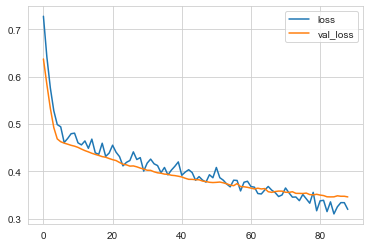

In [64]:
#plotting training and validation losses
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [65]:
#confusion matrix
y_pred = model.predict_classes(X_test)
print("Accuracy:", round(accuracy_score(y_test, model_predictions),2),"%")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.86 %
[[214   1]
 [ 32  18]]


In [66]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       215
           1       0.95      0.36      0.52        50

    accuracy                           0.88       265
   macro avg       0.91      0.68      0.73       265
weighted avg       0.88      0.88      0.85       265



Both Logistic, XGBClassifier & Keras Classification have highest 86% accuracy, so I chose Logistic Regression. 

### Model for Test

In [67]:
model = LogisticRegression()
model.fit(X_train,y_train)
model_predictions = model.predict(test)

In [68]:
model_predictions = pd.Series(model_predictions)
model_predictions

0      1
1      0
2      1
3      0
4      0
      ..
407    0
408    0
409    0
410    0
411    0
Length: 412, dtype: int64

In [69]:
test['Attrition'] = model_predictions.values
test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.380952,0.156836,0.492484,0.206897,0.821429,0.75,0.139394,0.000000,0.162100,0.142857,...,0.666667,0.000000,0.400,0.333333,1.000000,0.375,0.500000,0.666667,0.588235,1
1,0.404762,0.156836,0.399427,0.206897,0.214286,0.00,0.160550,1.000000,0.174194,0.657143,...,0.000000,0.333333,0.025,0.500000,0.666667,0.025,0.000000,0.000000,0.000000,0
2,0.142857,0.248780,0.199714,0.152639,0.285714,0.50,0.139394,0.333333,0.174194,0.842857,...,0.666667,0.000000,0.100,0.333333,0.333333,0.000,0.000000,0.000000,0.000000,1
3,0.142857,0.102804,0.521117,0.206897,0.428571,0.25,0.160550,1.000000,0.162100,0.685714,...,0.666667,0.333333,0.025,0.333333,0.666667,0.025,0.000000,0.000000,0.000000,0
4,0.619048,0.248780,0.780959,0.152639,0.035714,0.00,0.139394,0.333333,0.174194,0.800000,...,0.333333,0.000000,0.400,0.333333,0.333333,0.050,0.111111,0.133333,0.117647,0


In [70]:
test['Attrition'].value_counts()

0    395
1     17
Name: Attrition, dtype: int64

In [71]:
train['Attrition'].value_counts()

0    879
1    179
Name: Attrition, dtype: int64

In [72]:
round(test['Attrition'].value_counts(normalize=True)*100,2)

0    95.87
1     4.13
Name: Attrition, dtype: float64